# Test Results from NetLogo Simulation

## Main Changes
- Changed base-infection-risk from 0.006 to 0.06
- Added Home Patch

# Table of Contents
* [File Prepping](#file-prepping)
* [Models](#models)
* [Contact Tracing](#ct)
* [Daily Chart](#dc)
* [Daily Deaths](#dd)
* [Daily Total Cases](#dtc)
* [Daily Total Recoveries](#dtc)
* [Spread of Disease](#sod)
* [Total Vaccinations](#tv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

#For Extracting the model from csv
rows_to_keep = [5,6]
pd.set_option('display.max_columns', None)

# File Prepping <a class="anchor" id="file-prepping"></a>

## Test-11

In [2]:
test_model = pd.read_csv('Test-11\Test 11 - Galvez\Test 11 Galvez - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)

ct = pd.read_csv('Test-11\Test 11 - Galvez\Test 11 Galvez - Contact Tracing.csv', skiprows = 21, usecols=[0,1,5,9,13,17,21])
dc = pd.read_csv('Test-11\Test 11 - Galvez\Test 11 Galvez - Daily Chart.csv', skiprows = 19, usecols=[0,1,5,9,13])
dd = pd.read_csv('Test-11\Test 11 - Galvez\Test 11 Galvez - Daily Deaths.csv', skiprows = 18, usecols=[0,1,5,9])
dtc = pd.read_csv('Test-11\Test 11 - Galvez\Test 11 Galvez - Daily total cases.csv', skiprows = 16, usecols=[0,1])
dtr = pd.read_csv('Test-11\Test 11 - Galvez\Test 11 Galvez - Daily total recoveries.csv', skiprows = 16, usecols=[0,1])
sod = pd.read_csv('Test-11\Test 11 - Galvez\Test 11 Galvez - Spread of Disease.csv', skiprows = 19, usecols=[0,1,5,9,13])
tv = pd.read_csv('Test-11\Test 11 - Galvez\Test 11 Galvez - Total Vaccinations.csv', skiprows = 16, usecols=[0,1])

ct.columns = ['ticks', 'workplace', 'grocery', 'commute', 'hospital', 'leisure', 'home']
dc.columns = ['days', 'active_cases', 'recoveries', 'deaths', 'exposed']
dd.columns = ['days', 'total', 'senior', 'comorbid']
dtc.columns = ['days', 'cases']
dtr.columns = ['days', 'recoveries']
sod.columns = ['days', 'asym', 'moderate', 'severe', 'mild']
tv.columns = ['days', 'vax']

tick_represents = 15
ticks_to_days = int(1440/tick_represents)


In [6]:
test_model10 = pd.read_csv('Test-10\Test 10 - Galvez\Test 10 Galvez - Spread of Disease.csv', skiprows = lambda x: x not in rows_to_keep)

ct10 = pd.read_csv('Test-10\Test 10 - Galvez\Test 10 Galvez - Contact Tracing.csv', skiprows = 21, usecols=[0,1,5,9,13,17,21])
dc10 = pd.read_csv('Test-10\Test 10 - Galvez\Test 10 Galvez - Daily Chart.csv', skiprows = 19, usecols=[0,1,5,9,13])
dd10 = pd.read_csv('Test-10\Test 10 - Galvez\Test 10 Galvez - Daily Deaths.csv', skiprows = 18, usecols=[0,1,5,9])
dtc10 = pd.read_csv('Test-10\Test 10 - Galvez\Test 10 Galvez - Daily total cases.csv', skiprows = 16, usecols=[0,1])
dtr10 = pd.read_csv('Test-10\Test 10 - Galvez\Test 10 Galvez - Daily total recoveries.csv', skiprows = 16, usecols=[0,1])
sod10 = pd.read_csv('Test-10\Test 10 - Galvez\Test 10 Galvez - Spread of Disease.csv', skiprows = 19, usecols=[0,1,5,9,13])
tv10 = pd.read_csv('Test-10\Test 10 - Galvez\Test 10 Galvez - Total Vaccinations.csv', skiprows = 16, usecols=[0,1])

ct10.columns = ['ticks', 'workplace', 'grocery', 'commute', 'hospital', 'leisure', 'home']
dc10.columns = ['days', 'active_cases', 'recoveries', 'deaths', 'exposed']
dd10.columns = ['days', 'total', 'senior', 'comorbid']
dtc10.columns = ['days', 'cases']
dtr10.columns = ['days', 'recoveries']
sod10.columns = ['days', 'asym', 'moderate', 'severe', 'mild']
tv10.columns = ['days', 'vax']


# Models <a class="anchor" id="models"></a>

In [7]:
test_model

,covid-variant,commute-area,mask-wear-faceshield-percent,healthcare-area,leisure-area,essential-worker-count,starting-infected-severe,vax-type,total-population,starting-infected-moderate,grocery-area,comorbidity-count,vax-per-day,pandemic-time,maximum-days,starting-infected-asymp,curfew-hours,workplace-area,tick-represents,starting-infected-mild,starting-vax-percent,healthcare-worker-count,alert-level,mask-wear-percent,senior-count
0,"""Delta""",6000,80,3000,9000,412,11,"""Average""",2065,10,6000,83,1,3,0,10,8,9000,"""15 Minutes""",11,35,227,"""Level 4 & 5""",95,83


In [8]:
test_model10

,covid-variant,commute-area,mask-wear-faceshield-percent,healthcare-area,leisure-area,essential-worker-count,starting-infected-severe,vax-type,total-population,starting-infected-moderate,grocery-area,comorbidity-count,vax-per-day,pandemic-time,maximum-days,starting-infected-asymp,curfew-hours,workplace-area,tick-represents,starting-infected-mild,starting-vax-percent,healthcare-worker-count,alert-level,mask-wear-percent,senior-count
0,"""Delta""",1500,80,750,2250,113,1,"""Average""",516,1,1500,21,1,3,0,1,8,2250,"""10 Minutes""",1,35,57,"""Level 4 & 5""",95,21


In [71]:
print(ticks_to_days)

144


# Contact Tracing <a class="anchor" id="ct"></a>

In [72]:
#Ticks to Days
ct_days = ct.iloc[0::ticks_to_days, :]

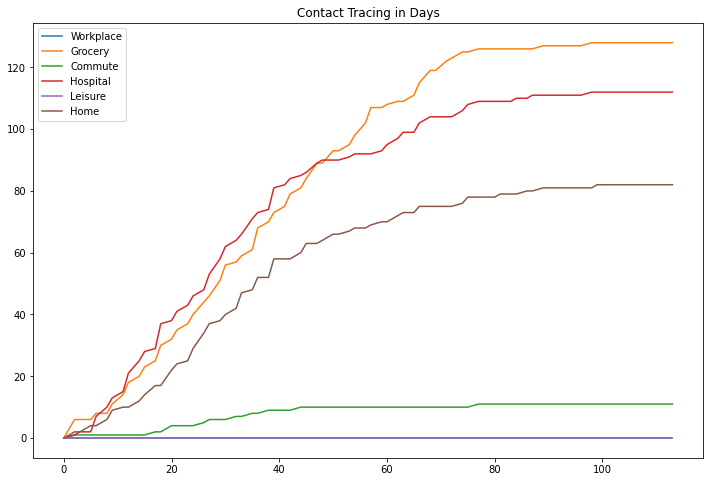

In [74]:
plt.figure(figsize=(12,8))
plt.plot(ct_days.ticks, ct_days.workplace)
plt.plot(ct_days.ticks, ct_days.grocery)
plt.plot(ct_days.ticks, ct_days.commute)
plt.plot(ct_days.ticks, ct_days.hospital)
plt.plot(ct_days.ticks, ct_days.leisure)
plt.plot(ct_days.ticks, ct_days.home)
plt.legend(['Workplace', 'Grocery', 'Commute', 'Hospital', 'Leisure', 'Home'])
plt.title('Contact Tracing in Days')
plt.show()

# Daily Chart <a class="anchor" id="dc"></a>

In [75]:
dc_days = dc.iloc[0::ticks_to_days, :]

In [76]:
dc_days.head()

,days,active_cases,recoveries,deaths,exposed
0,0,42,0,0,0
144,2,39,13,0,2
288,3,35,18,1,2
432,5,33,22,1,0
576,6,36,26,1,1


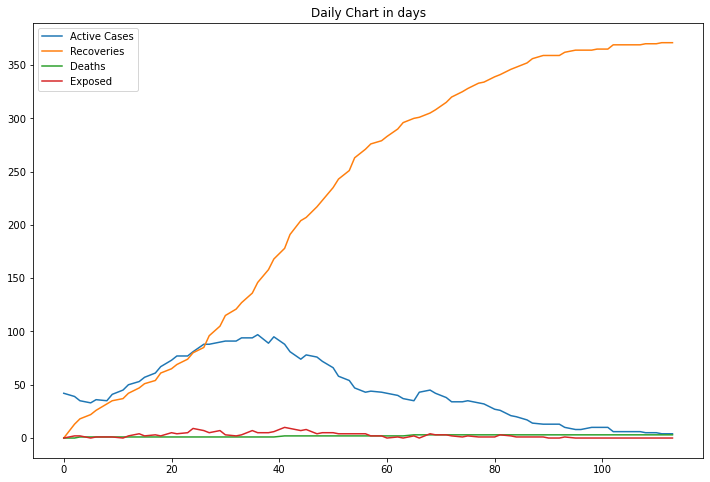

In [77]:
plt.figure(figsize=(12,8))
plt.plot(dc_days.days, dc_days.active_cases)
plt.plot(dc_days.days, dc_days.recoveries)
plt.plot(dc_days.days, dc_days.deaths)
plt.plot(dc_days.days, dc_days.exposed)
plt.title('Daily Chart in days')
plt.legend(['Active Cases', 'Recoveries', 'Deaths', 'Exposed'])
plt.show()

# Daily Deaths <a class="anchor" id="dd"></a>

In [78]:
dd_days = dd.iloc[1::ticks_to_days, :]

In [79]:
dd_days.head()

,days,total,senior,comorbid
1,1,0,0,0
145,2,0,0,0
289,4,1,0,0
433,5,1,0,0
577,7,1,0,0


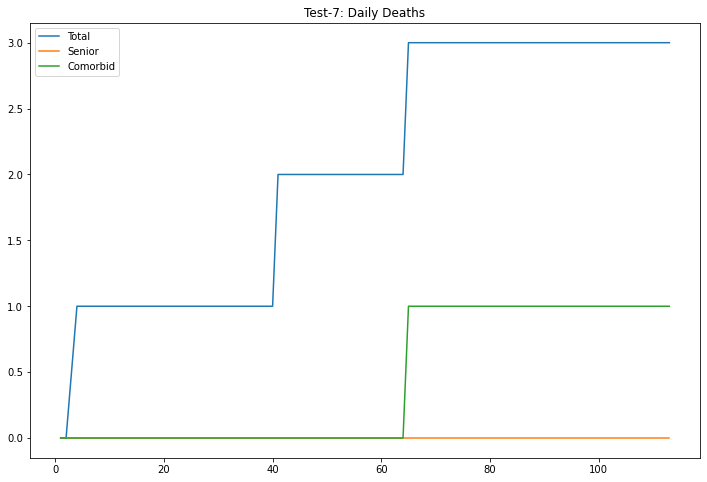

In [80]:
plt.figure(figsize=(12,8))
plt.plot(dd_days.days, dd_days.total)
plt.plot(dd_days.days, dd_days.senior)
plt.plot(dd_days.days, dd_days.comorbid)
plt.title('Test-7: Daily Deaths')
plt.legend(['Total', 'Senior', 'Comorbid'])
plt.show()

# Daily Total Cases <a class="anchor" id="dtc"></a>

In [81]:
dtc_days = dtc.iloc[1::ticks_to_days, :]

In [82]:
dtc_days.tail()

,days,cases
10225,107,375
10369,109,375
10513,110,375
10657,112,375
10801,113,375


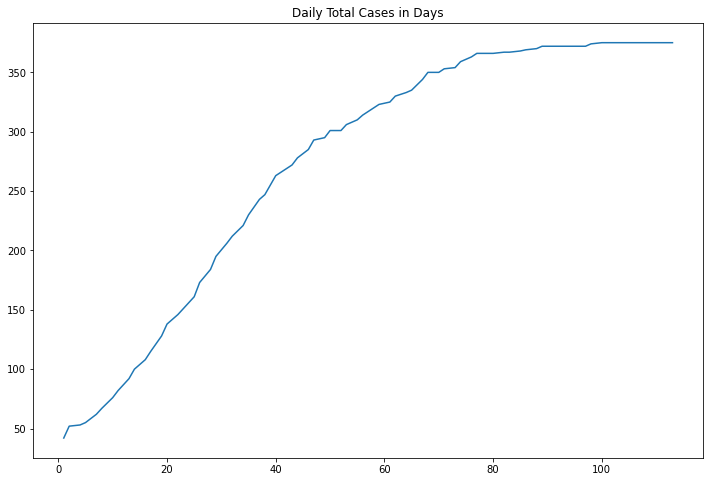

In [83]:
plt.figure(figsize=(12,8))
plt.plot(dtc_days.days, dtc_days.cases)
plt.title('Daily Total Cases in Days')
plt.show()

# Daily Total Recoveries <a class="anchor" id="dtr"></a>

In [84]:
dtr_days = dtr.iloc[1::ticks_to_days, :]

In [85]:
dtr_days.head()

,days,recoveries
1,1,5
145,2,13
289,4,18
433,5,22
577,7,26


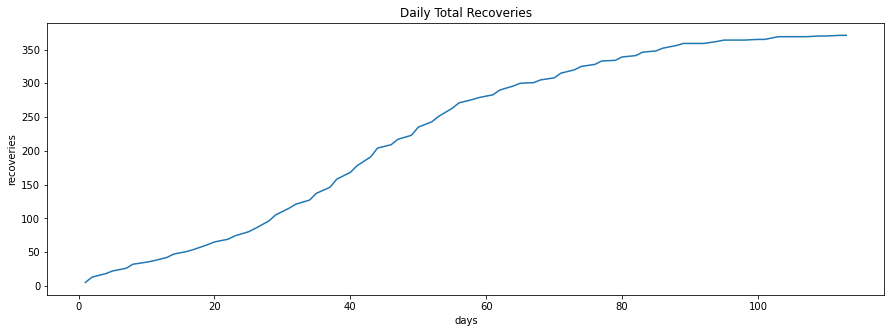

In [86]:
plt.figure(figsize=(15,5))
plt.plot(dtr_days.days, dtr_days.recoveries)
plt.title('Daily Total Recoveries')
plt.xlabel('days')
plt.ylabel('recoveries')
plt.show()

# Spread of Disease <a class="anchor" id="sod"></a>

In [87]:
#Conversion of Ticks to Days
sod_days = sod.iloc[1::ticks_to_days, :]
sod_days9 = sod9.iloc[1::ticks_to_days, :]

In [93]:
scale_factor = 4

df = sod_days.drop('days', axis=1)
sod_scaled = df * scale_factor
sod_scaled = pd.concat((sod_scaled, sod_days.days), 1)

C:\Users\Daft\AppData\Local\Temp\ipykernel_21732\811113141.py:5: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  sod_scaled = pd.concat((sod_scaled, sod_days.days), 1)


In [94]:
sod_days.head()

,days,asym,moderate,severe,mild
1,1,10,8,9,10
145,2,7,13,10,9
289,4,7,9,9,9
433,5,6,9,9,8
577,7,7,11,12,5


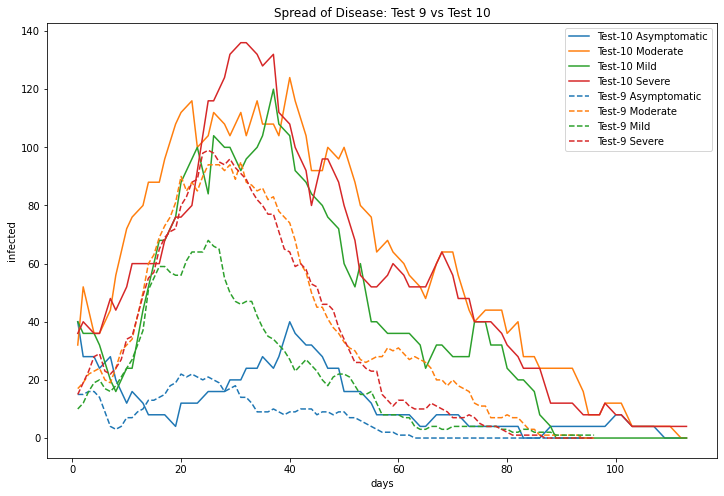

In [95]:
plt.figure(figsize=(12,8))
plt.plot(sod_scaled.days, sod_scaled.asym)
plt.plot(sod_scaled.days, sod_scaled.moderate)
plt.plot(sod_scaled.days, sod_scaled.mild)
plt.plot(sod_scaled.days, sod_scaled.severe)
plt.plot(sod_days9.days, sod_days9.asym, '--', color="tab:blue")
plt.plot(sod_days9.days, sod_days9.moderate, '--', color="tab:orange")
plt.plot(sod_days9.days, sod_days9.mild, '--', color="tab:green")
plt.plot(sod_days9.days, sod_days9.severe, '--', color="tab:red")
plt.title('Spread of Disease: Test 9 vs Test 10')
plt.legend(['Test-10 Asymptomatic', 'Test-10 Moderate', 'Test-10 Mild', 'Test-10 Severe',
            'Test-9 Asymptomatic', 'Test-9 Moderate', 'Test-9 Mild', 'Test-9 Severe'])
plt.xlabel('days')
plt.ylabel('infected')
plt.show()

In [32]:
test_model8

,commute-area,covid-variant,mask-wear-faceshield-percent,healthcare-area,leisure-area,essential-worker-count,vax-type,total-population,grocery-area,comorbidity-count,vax-per-day,pandemic-time,maximum-days,curfew-hours,workplace-area,tick-represents,starting-vax-percent,healthcare-worker-count,alert-level,mask-wear-percent,starting-infected,senior-count
0,1500,"""Delta""",80,750,2250,365,"""Average""",1663,1500,67,1,3,0,8,2250,"""10 Minutes""",50,183,"""Level 4 & 5""",95,17,67


In [33]:
test_model

,covid-variant,commute-area,mask-wear-faceshield-percent,healthcare-area,leisure-area,essential-worker-count,starting-infected-severe,vax-type,total-population,starting-infected-moderate,grocery-area,comorbidity-count,vax-per-day,pandemic-time,maximum-days,starting-infected-asymp,curfew-hours,workplace-area,tick-represents,starting-infected-mild,starting-vax-percent,healthcare-worker-count,alert-level,mask-wear-percent,senior-count
0,"""Delta""",6000,80,3000,9000,454,15,"""Average""",2065,17,6000,83,1,3,0,15,8,9000,"""10 Minutes""",10,50,227,"""Level 4 & 5""",95,83


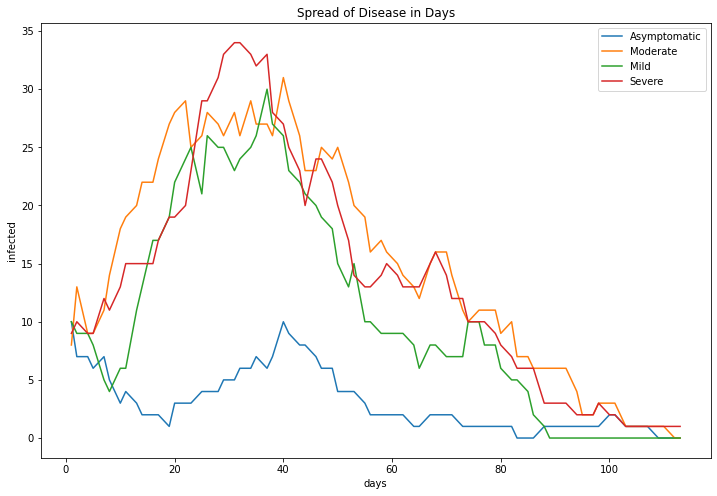

In [96]:
plt.figure(figsize=(12,8))
plt.plot(sod_days.days, sod_days.asym)
plt.plot(sod_days.days, sod_days.moderate)
plt.plot(sod_days.days, sod_days.mild)
plt.plot(sod_days.days, sod_days.severe)
plt.title('Spread of Disease in Days')
plt.legend(['Asymptomatic', 'Moderate', 'Mild', 'Severe'])
plt.xlabel('days')
plt.ylabel('infected')
plt.show()

In [99]:
sod_days.tail()

,days,asym,moderate,severe,mild
10225,107,1,1,1,0
10369,109,0,1,1,0
10513,110,0,1,1,0
10657,112,0,0,1,0
10801,113,0,0,1,0


# Total Vaccinations <a class="anchor" id="tv"></a>

In [24]:
#Ticks to Days
tv_days = tv.iloc[1::ticks_to_days, :]

In [25]:
tv_days.head()

,days,vax
1,1,1025
145,2,1025
289,3,1025
433,4,1025
577,5,1025


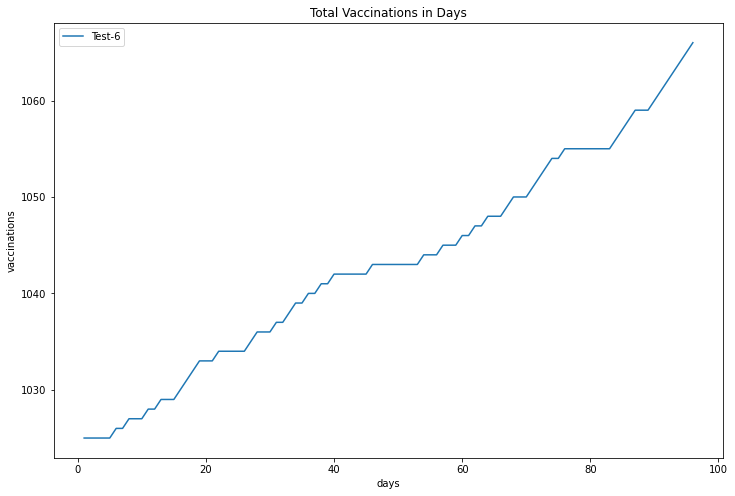

In [26]:
plt.figure(figsize=(12,8))
plt.plot(tv_days.days, tv_days.vax)
plt.title('Total Vaccinations in Days')
plt.legend(['Test-6'])
plt.xlabel('days')
plt.ylabel('vaccinations')
plt.show()